In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import IO

In [6]:
history, model = IO.load_model('lstm', 'examAndAn')
X_train, X_test, y_train, y_test, X_train_pad, X_test_pad, y_train_cat, y_test_cat, class_names = IO.load_training_data("MenKreuzAnEx")
history_df = pd.DataFrame(history.history)
history_df.to_csv('training_history.csv', index=False)


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


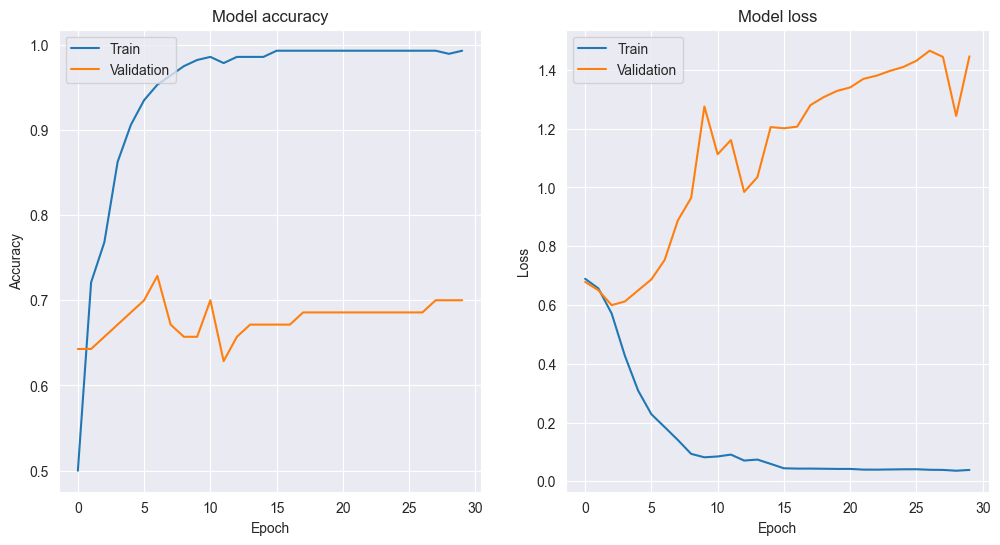

In [7]:
# Ensure the history object has the keys
print(history.history.keys())

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
if 'accuracy' in history.history:
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
if 'loss' in history.history:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Class Names: ['Kreuzband' 'Meniskus']
Confusion Matrix Shape: (2, 2)


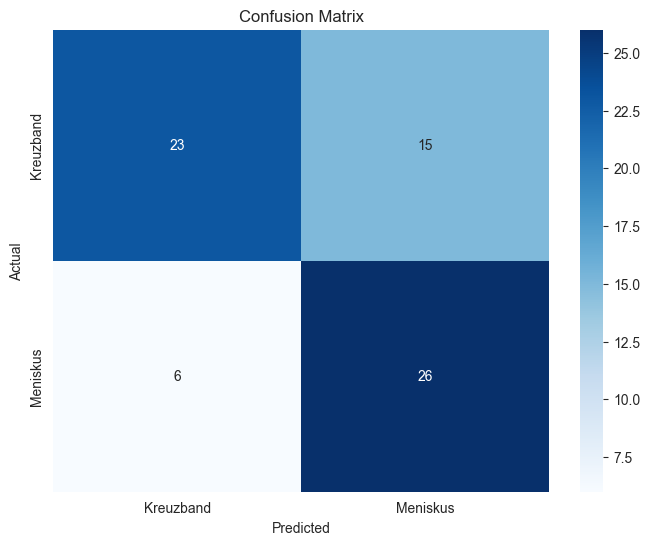

              precision    recall  f1-score   support

   Kreuzband       0.79      0.61      0.69        38
    Meniskus       0.63      0.81      0.71        32

    accuracy                           0.70        70
   macro avg       0.71      0.71      0.70        70
weighted avg       0.72      0.70      0.70        70



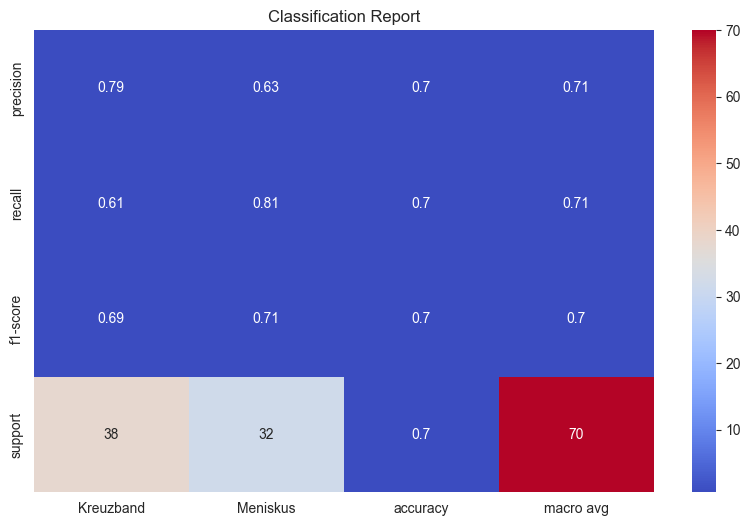

<Figure size 1000x600 with 0 Axes>

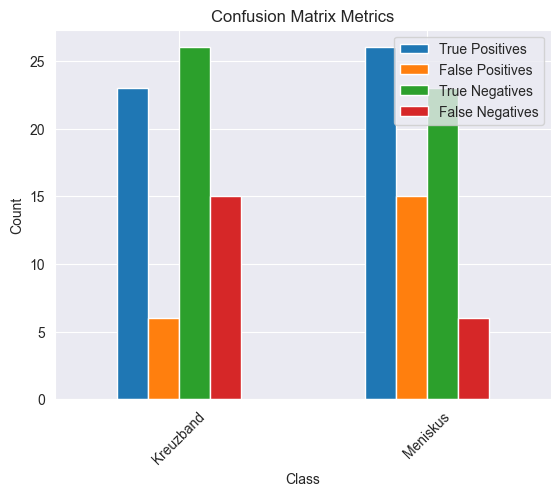

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
# Predict probabilities
y_pred_prob = model.predict(X_test_pad)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Debug: print class names and confusion matrix shape
print("Class Names:", class_names)
print("Confusion Matrix Shape:", cm.shape)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=class_names))

# Classification Report Visualization
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='coolwarm')
plt.title('Classification Report')
plt.show()

# Compute TP, FP, TN, FN for each class
def compute_confusion_metrics(cm):
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    return TP, FP, TN, FN

TP, FP, TN, FN = compute_confusion_metrics(cm)

# Create a DataFrame for these metrics
confusion_metrics_df = pd.DataFrame({
    'True Positives': TP,
    'False Positives': FP,
    'True Negatives': TN,
    'False Negatives': FN
}, index=class_names)

# Plot these metrics
plt.figure(figsize=(10, 6))
confusion_metrics_df.plot(kind='bar', stacked=False)
plt.title('Confusion Matrix Metrics')
plt.ylabel('Count')
plt.xlabel('Class')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()
